# Installing wordcloud library

In [1]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install wordcloud

# Loading libraries

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
print("Libraries loaded!")

Libraries loaded!


# Generating cloud for patient case example

<b>Load cases</b>

In [9]:
import pandas as pd

df1= pd.read_csv('cases2.csv',encoding='latin-1')
df1=df1.drop(['Notes'], axis=1)

df1=df1.dropna()
df1.head(30)


,Case,Label
0,A 40-year-old man was hospitalized due to jaun...,0
1,A 38-year-old male with AIDS presented with a ...,0
2,A 67-year-old male was admitted to our hospita...,0
3,30-year-old woman. No significant past medical...,0
4,42 year old otherwise healthy man. Painless ri...,0
5,"This 59-year-old female, asymptomatic except f...",0
6,A 65-year-old male presented with bilateral ce...,0
7,A 70-year-old man was hospitalized in January ...,0
8,This 12 year old boy presented with a painless...,0
9,A 50-year-old Pakistani man presented to our h...,0


<b>View cloud for one case</b>


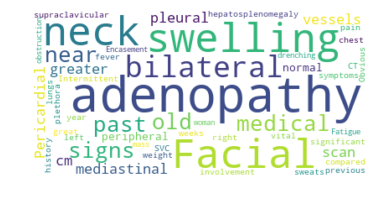

In [10]:
text = df1.Case[3]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",max_words=50).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Save word cloud as image

In [32]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

<b>Combine all wine reviews</b>

In [11]:
text = " ".join(case for case in df1.Case)
print ("There are %d words in the combination of all cases." % len(text))

There are 12491 words in the combination of all cases.


__Create stopword list__

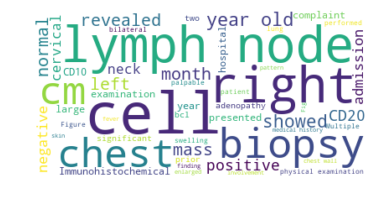

In [12]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(['the', 'is', 'are', 'was','months', 'showed','month', 'week','weeks', 'symptoms','year','years','finding','history','patient','clinic','hospital','presents','presented','old'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_words=50).generate(text)
# wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

# fit our vectorizer. This will take a while depending on your computer. 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
# this could take a while
vect.fit(df1.Case.values)
# get the column names
vect.get_feature_names()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kyle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['a',
 'abdomen',
 'abdominal',
 'abnormal',
 'about',
 'above',
 'absence',
 'abuse',
 'accompanying',
 'adenopathy',
 'admission',
 'admitted',
 'adrenal',
 'african',
 'after',
 'age',
 'ago',
 'aids',
 'all',
 'also',
 'american',
 'among',
 'amphophilic',
 'amplification',
 'an',
 'analysis',
 'and',
 'anelaborate',
 'angeles',
 'angiocentrically',
 'angulated',
 'angulus',
 'another',
 'anterior',
 'anti',
 'antibodies',
 'antibody',
 'antigen',
 'antituberculous',
 'any',
 'apart',
 'appeared',
 'appetite',
 'approximately',
 'architecture',
 'area',
 'areas',
 'arranged',
 'as',
 'aspiration',
 'assumed',
 'asthma',
 'asymptomatic',
 'at',
 'atypical',
 'axilla',
 'axillae',
 'axillary',
 'b',
 'back',
 'bangladesh',
 'bcl',
 'be',
 'beats',
 'because',
 'been',
 'before',
 'being',
 'below',
 'bilateral',
 'biopsy',
 'biotinimmunoperoxidase',
 'black',
 'blood',
 'body',
 'bone',
 'both',
 'bound',
 'boy',
 'breadth',
 'breath',
 'bronchial',
 'bronchoscopy',
 'brush',
 'burn'

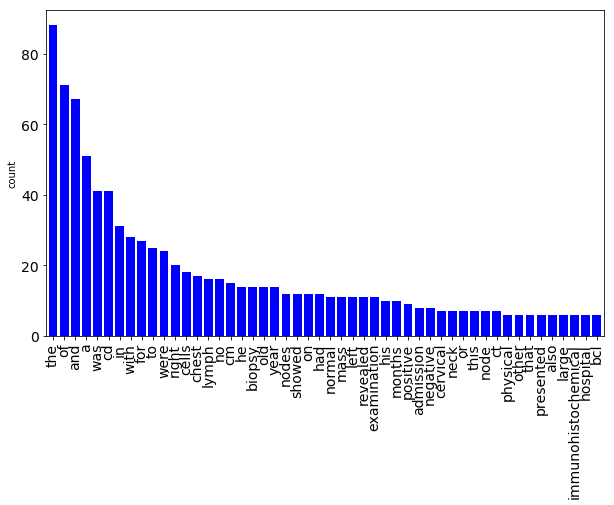

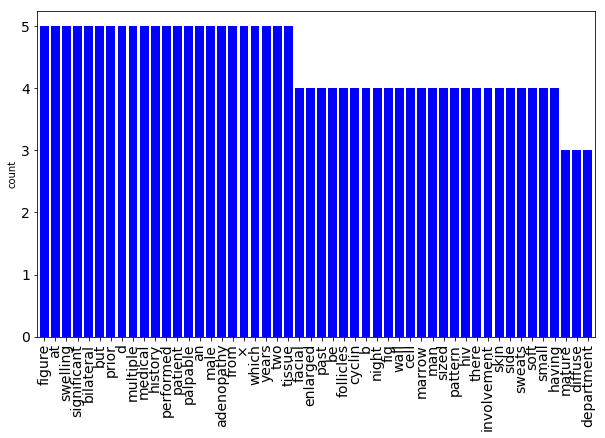

In [15]:
def plotFeatures(df1):   
    neg_doc_matrix = vect.transform(df1[df1.Label == 0].Case)
    pos_doc_matrix = vect.transform(df1[df1.Label == 1].Case)
    neg_tf = np.sum(neg_doc_matrix,axis=0)
    pos_tf = np.sum(pos_doc_matrix,axis=0)
    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))

    term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
    term_freq_df.columns = ['negative', 'positive']
    term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
    term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

    #Create a series from the sparse matrix
    d = pd.Series(term_freq_df.total, 
                  index = term_freq_df.index).sort_values(ascending=False)
    ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    
plotFeatures(df1)

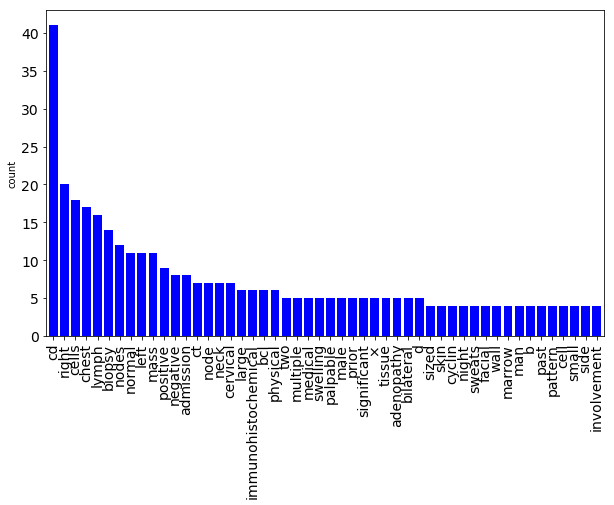

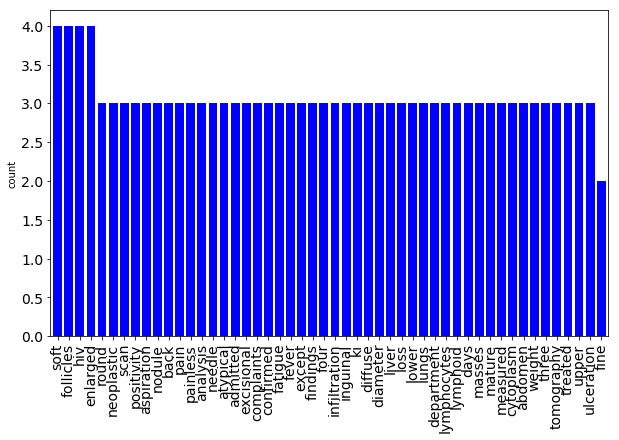

In [19]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['patient','complaint','examination','showed','seen','performed','figure','fig','cm','months', 'time','presented','revealed','mm', 'found','month', 'week','weeks', 'symptoms','year','years','finding','history','patient','clinic','hospital','presents','presented','old'])

vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer_better, 
                       stop_words = stopwords)
# this could take a while
vect.fit(df1.Case.values)
plotFeatures(df1)

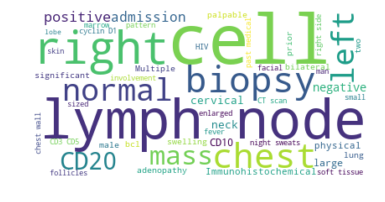

In [20]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()